<a href="https://colab.research.google.com/github/Nattakonjpg/AIPrototype2023/blob/main/AI_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง))
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้)

##Import

In [8]:
import tensorflow as tf
from tensorflow import keras #interface
from tensorflow.keras import layers

#Sequential แบบที่หนึ่ง

##Define


In [ ]:
#Define Sequential model with 3 Layers
model = keras.Sequential(
        [
             keras.Input(shape=(5,)), #4 Node
             layers.Dense(2, activation="relu", name="layer1"), #Dense = fully connected
             layers.Dense(3, activation="relu", name="layer2"),
             layers.Dense(5, name="output")  #4 class
        ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##predict

In [ ]:
x = tf.ones((5, 5)) #5 row 4 columns = else is 1, batch size = 5

In [ ]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
y = model(x)

In [ ]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442]],
      dtype=float32)>

#Sequential แบบที่สอง

In [ ]:
#Define Sequential model with 3 Layers
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,))) #4 Node
model2.add(layers.Dense(2, activation="relu", name="layer1")) #Dense = fully connected
model2.add(layers.Dense(3, activation="relu", name="layer2"))
model2.add(layers.Dense(5, name="softmax"))  #5 class


In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 softmax (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##ปรับเปลี่ยน Network

In [ ]:
model2.pop() # ตัดหัว

In [ ]:
model2.summary()

In [ ]:
model2.add(layers.Dense(6))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 dense (Dense)               (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x = tf.ones((5, 4))
y = model2(x)
print(y) # 6 column , 4 row = 6 node

tf.Tensor(
[[-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]], shape=(5, 6), dtype=float32)


#Train model Sequentail 2


In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras #interface
import matplotlib.pyplot as plt


##Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


###แปลงค่าเป็น 0-1 เพื่อนำเข้า network


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

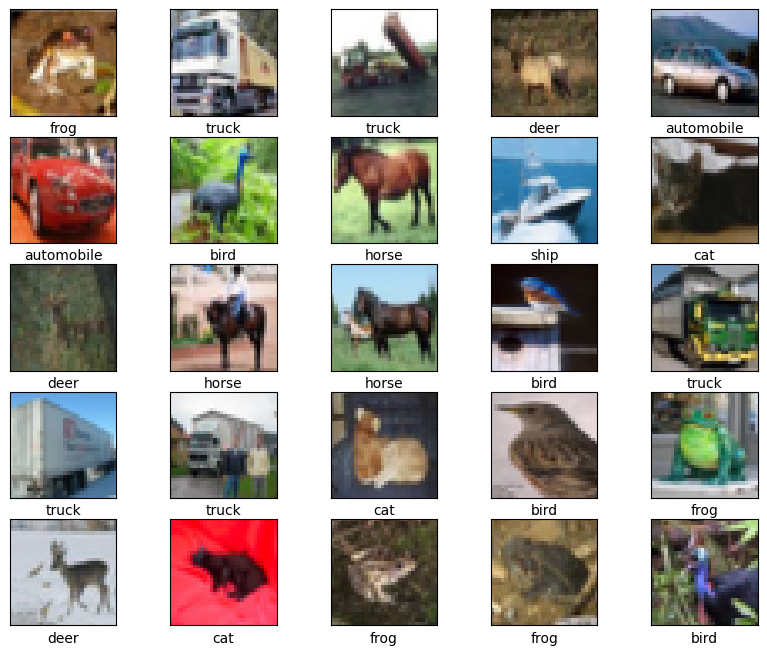

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Define

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

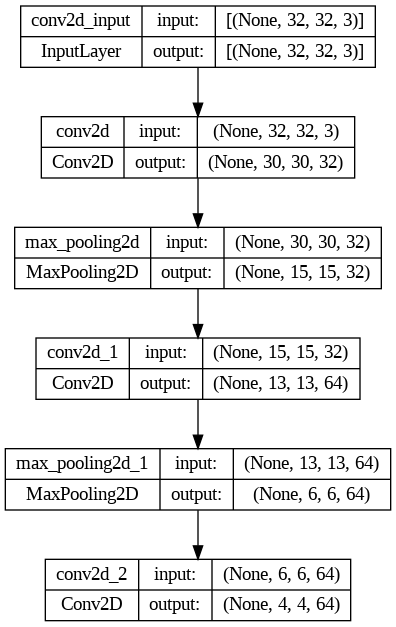

In [10]:
keras.utils.plot_model(model,show_shapes=True)

###ต่อด้วย flatten และ dense เพื่อทำนาย


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

###Define training parameters

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5333 - accuracy: 0.4407 - val_loss: 1.3076 - val_accuracy: 0.5321
Epoch 2/2
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1472 - accuracy: 0.5934 - val_loss: 1.1244 - val_accuracy: 0.6010


In [19]:
history.history

{'loss': [1.5332508087158203, 1.147242784500122],
 'accuracy': [0.44067999720573425, 0.5934000015258789],
 'val_loss': [1.307591438293457, 1.1243948936462402],
 'val_accuracy': [0.5321000218391418, 0.6010000109672546]}

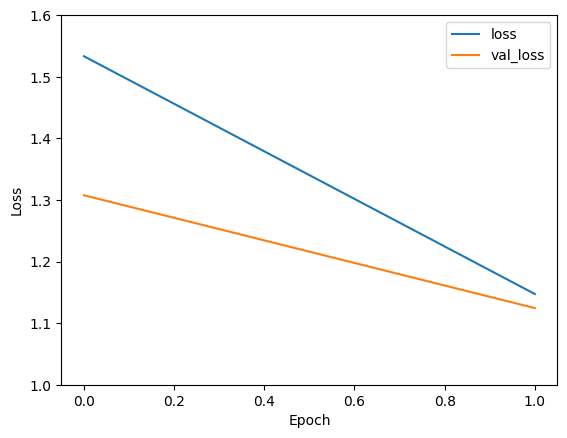

In [21]:
plt.plot([0,1],history.history['loss'], label='loss')
plt.plot([0,1],history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1.0, 1.6])
plt.legend(loc='upper right')

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 1.1244 - accuracy: 0.6010 - 3s/epoch - 11ms/step


In [29]:
print(f'test_acc: {test_acc:.4f}%')

test_acc: 0.6010%


#Functional


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
input_images = keras.Input(shape=(32, 32, 3), name="img") #shape = 32,32 *3 ชื่อ layer = img
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # layer Conv2D 3*3 32 channel, (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

สำคัญ Functional ต้องมี บอก input = input_images output = output

In [32]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [33]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

In [34]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5660 - accuracy: 0.4282 - val_loss: 1.2886 - val_accuracy: 0.5392
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2114 - accuracy: 0.5695 - val_loss: 1.1332 - val_accuracy: 0.6022
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0465 - accuracy: 0.6305 - val_loss: 1.0440 - val_accuracy: 0.6400
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9490 - accuracy: 0.6633 - val_loss: 0.9786 - val_accuracy: 0.6621
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8733 - accuracy: 0.6917 - val_loss: 0.9499 - val_accuracy: 0.6709
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8187 - accuracy: 0.7130 - val_loss: 0.8834 - val_accuracy: 0.6964
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7650 - accuracy: 0.7317 - val_loss: 0.8986 -

313/313 - 3s - loss: 0.8661 - accuracy: 0.7099 - 3s/epoch - 9ms/step


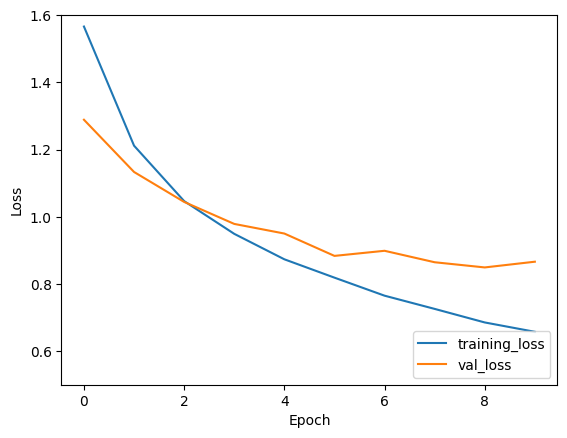

In [36]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [37]:
print(f'test_acc: {test_acc:.4f}%')

test_acc: 0.7099%


#ResNet
- skip connection

In [38]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_4[0][0]']            
 g2D)                                                                                    

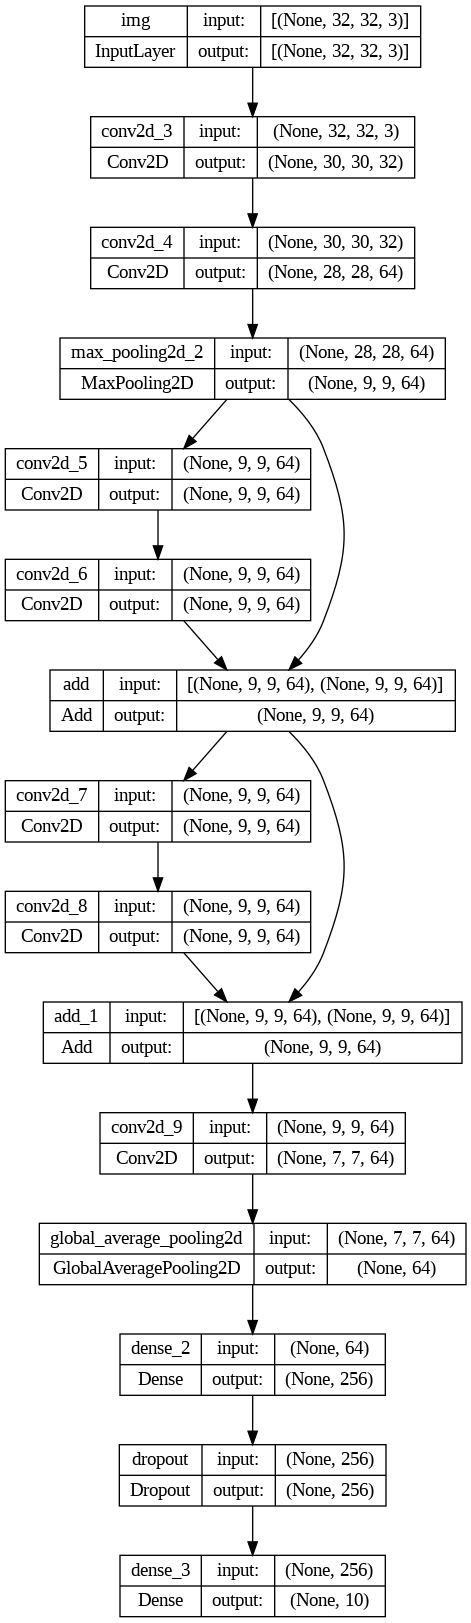

In [39]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [40]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 234s 148ms/step - loss: 1.6487 - accuracy: 0.3668 - val_loss: 1.3178 - val_accuracy: 0.5127
Epoch 2/10
1563/1563 [==============================] - 248s 159ms/step - loss: 1.1751 - accuracy: 0.5769 - val_loss: 1.0948 - val_accuracy: 0.6181
Epoch 3/10
1563/1563 [==============================] - 240s 153ms/step - loss: 0.9604 - accuracy: 0.6610 - val_loss: 0.8865 - val_accuracy: 0.6856
Epoch 4/10
1563/1563 [==============================] - 239s 153ms/step - loss: 0.8365 - accuracy: 0.7060 - val_loss: 0.8078 - val_accuracy: 0.7126
Epoch 5/10
1563/1563 [==============================] - 244s 156ms/step - loss: 0.7413 - accuracy: 0.7413 - val_loss: 0.7713 - val_accuracy: 0.7337
Epoch 6/10
1563/1563 [==============================] - 245s 157ms/step - loss: 0.6763 - accuracy: 0.7655 - val_loss: 0.7585 - val_accuracy: 0.7404
Epoch 7/10
1563/1563 [==============================] - 235s 151ms/step - loss: 0.6222 - accuracy: 0.7851 - val_

313/313 - 3s - loss: 0.8661 - accuracy: 0.7099 - 3s/epoch - 10ms/step


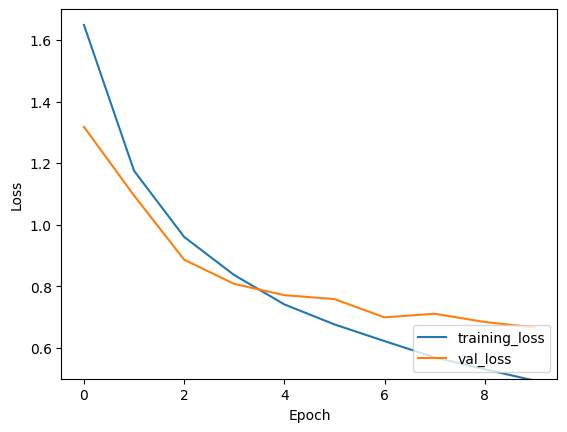

In [46]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [42]:
print(f'test_acc: {test_acc:.4f}%')

test_acc: 0.7099%


#Tensorflow Data Pipeline


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [45]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_11 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                               

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=1,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [49]:
from tensorflow.keras import optimizers

In [50]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-2),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 30,
      epochs=50,
      verbose=1)

Epoch 1/50


<ipython-input-52-fa4adcebe705>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


30/30 [==============================] - 14s 410ms/step - loss: 2.8078 - accuracy: 0.5000
Epoch 2/50
30/30 [==============================] - 9s 297ms/step - loss: 0.7958 - accuracy: 0.4333
Epoch 3/50
30/30 [==============================] - 9s 291ms/step - loss: 0.7857 - accuracy: 0.4000
Epoch 4/50
30/30 [==============================] - 10s 320ms/step - loss: 0.7026 - accuracy: 0.4667
Epoch 5/50
30/30 [==============================] - 9s 285ms/step - loss: 0.7408 - accuracy: 0.3333
Epoch 6/50
30/30 [==============================] - 8s 262ms/step - loss: 0.7198 - accuracy: 0.3667
Epoch 7/50
30/30 [==============================] - 10s 321ms/step - loss: 0.7073 - accuracy: 0.4000
Epoch 8/50
30/30 [==============================] - 10s 318ms/step - loss: 0.7384 - accuracy: 0.3000
Epoch 9/50
30/30 [==============================] - 8s 263ms/step - loss: 0.6643 - accuracy: 0.6667
Epoch 10/50
30/30 [==============================] - 10s 321ms/step - loss: 0.6921 - accuracy: 0.5333
Epoch

In [56]:
history.history['loss']

[2.8077635765075684,
 0.7957665920257568,
 0.7856760025024414,
 0.7025883197784424,
 0.7408055067062378,
 0.7197757363319397,
 0.7073252201080322,
 0.7384039163589478,
 0.6643342971801758,
 0.692125678062439,
 0.7113789916038513,
 0.7246963381767273,
 0.6944868564605713,
 0.6831234097480774,
 0.7234237194061279,
 0.7302005290985107,
 0.7100852131843567,
 0.7085586190223694,
 0.6639677882194519,
 0.7355688214302063,
 0.7205899357795715,
 0.6738030910491943,
 0.7164308428764343,
 0.7132235169410706,
 0.6926976442337036,
 0.7173404097557068,
 0.7185991406440735,
 0.7197219133377075,
 0.7238089442253113,
 0.6940916180610657,
 0.6749810576438904,
 0.6984763741493225,
 0.6995347142219543,
 0.7151020765304565,
 0.6876302361488342,
 0.7058475017547607,
 0.6934987306594849,
 0.7036353945732117,
 0.7088174223899841,
 0.6739088892936707,
 0.7152917981147766,
 0.6999520659446716,
 0.6995847821235657,
 0.6777951717376709,
 0.6734923124313354,
 0.7477509379386902,
 0.704937756061554,
 0.701997220516

313/313 - 5s - loss: 0.8661 - accuracy: 0.7099 - 5s/epoch - 15ms/step


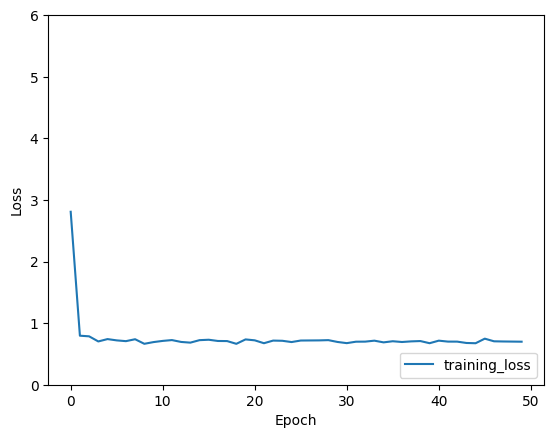

In [55]:
plt.plot(range(50),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 6])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)